In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1],[0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, 0.1],[0.1, 1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500) 
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
#print(dist_01[:5,:]) #print(dist_02[:5,:])
print(dist_02.shape)



(500, 2)


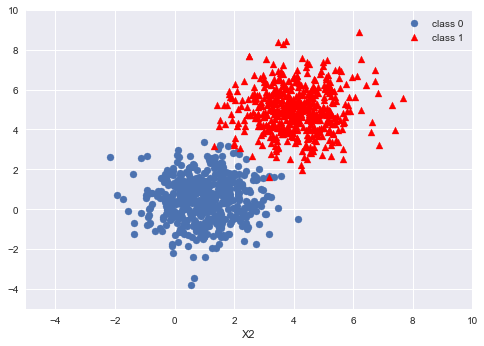

In [4]:
# Data Visualize
plt.scatter(dist_01[:,0],dist_01[:,1], label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1], label='class 1',color='r',marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('X1')
plt.xlabel('X2')
plt.legend()
plt.show()

In [5]:
# Create training and testing set 
data = np.zeros((1000,3)) 
data[:500,:2] = dist_01 
data[500:,:2] = dist_02 

data[500:,-1] = 1.0

print(data)
np.random.shuffle(data)
split = int(.8*data.shape[0]) 
print("Split: ",split) 

###################################### 
X_train = data[:split,:-1] 
X_test = data[split:,:-1]
Y_train = data[:split,-1] 
Y_test = data[split:,-1]
print(X_train.shape, Y_train.shape) 
print(X_test.shape, Y_test.shape)

[[-0.2917802   1.57563487  0.        ]
 [ 1.61173841  0.71243966  0.        ]
 [ 0.22632254  0.37824322  0.        ]
 ...
 [ 2.849894    4.37035777  1.        ]
 [ 2.08890334  4.14728372  1.        ]
 [ 4.52321828  7.30400443  1.        ]]
Split:  800
(800, 2) (800,)
(200, 2) (200,)


In [6]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [7]:
def predict(X,weights):
    """X-> m*(n+1) matrix, W-> (n+1,) vector
       y = x0.theta0 + x1.theta1 + x2.theta2
       Pred => h(y) = sigmoid(y)
       # O/P - (m,) for I/P X - (m,n+1) and W - (n+1,)
       else for single example, it will be float value.
    """
    z = np.dot(X,weights)
    prediction = sigmoid(z)
    return prediction

In [8]:
def loss(X,Y,weights):
    """Binary Cross Entropy
       Loss Fn = Sum for all example m {( Yi.log(Yi_) + (1-Yi).log(1-Yi_) )}
       Yi = actual value of example Xi
       Yi_ = predicted value of example Xi
       we take mean of loss of examples by dividing total loss of all examples by total no of examples
       np.mean() - gives mean directly
       # O/P - (m,) for I/P X - (m,n+1), Y- (m,) and W - (n+1,)
       else for single example, it will be float value.
    """
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [9]:
def update(X,Y,weights,learning_rate):
    """Perform weight update for 1 epoch
       # O/P - (n+1,) for I/P X - (m,n+1), Y- (m,), W - (n+1,) and learning_rate - constant float
       even for single example, it will be same (n+1,)
       Weight Update- d(Loss Fn)/dWj = (Y - Y_).Xj for jth weight
       we are taking -ve of update rule, i.e, Gradient Descent 
    """
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y) # (n+1,), but it contains sum of dw of all examples, so we need to take mean 
                            # of it by dividing it by total no of examples in i/p i.e, m 
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [10]:
def train(X,Y,learning_rate=0.8,maxEpochs=100):
    
    # Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Init Weights
    weights = np.zeros(X.shape[1]) # n+1 entries
    
    for epoch in range(maxEpochs):
        # Iterate over all epochs and make update
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
            
            
    return weights 
    
    

In [11]:
weights = train(X_train,Y_train, maxEpochs=1000)

Epoch 0 Loss 0.7409
Epoch 10 Loss 0.2449
Epoch 20 Loss 0.1756
Epoch 30 Loss 0.1396
Epoch 40 Loss 0.1176
Epoch 50 Loss 0.1026
Epoch 60 Loss 0.0917
Epoch 70 Loss 0.0835
Epoch 80 Loss 0.0769
Epoch 90 Loss 0.0716
Epoch 100 Loss 0.0671
Epoch 110 Loss 0.0634
Epoch 120 Loss 0.0602
Epoch 130 Loss 0.0574
Epoch 140 Loss 0.0549
Epoch 150 Loss 0.0527
Epoch 160 Loss 0.0508
Epoch 170 Loss 0.0490
Epoch 180 Loss 0.0474
Epoch 190 Loss 0.0459
Epoch 200 Loss 0.0446
Epoch 210 Loss 0.0434
Epoch 220 Loss 0.0423
Epoch 230 Loss 0.0412
Epoch 240 Loss 0.0403
Epoch 250 Loss 0.0393
Epoch 260 Loss 0.0385
Epoch 270 Loss 0.0377
Epoch 280 Loss 0.0370
Epoch 290 Loss 0.0362
Epoch 300 Loss 0.0356
Epoch 310 Loss 0.0350
Epoch 320 Loss 0.0344
Epoch 330 Loss 0.0338
Epoch 340 Loss 0.0333
Epoch 350 Loss 0.0327
Epoch 360 Loss 0.0323
Epoch 370 Loss 0.0318
Epoch 380 Loss 0.0313
Epoch 390 Loss 0.0309
Epoch 400 Loss 0.0305
Epoch 410 Loss 0.0301
Epoch 420 Loss 0.0297
Epoch 430 Loss 0.0294
Epoch 440 Loss 0.0290
Epoch 450 Loss 0.0287

In [12]:
print(weights)

[-9.45320654  1.47802812  2.15426172]


In [13]:
x1 = np.linspace(-4,10,20)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

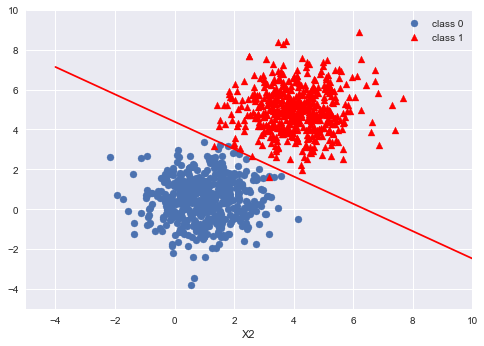

In [14]:
# Data Visualize
plt.scatter(dist_01[:,0],dist_01[:,1], label='class 0')
plt.scatter(dist_02[:,0],dist_02[:,1], label='class 1',color='r',marker='^')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.plot(x1,x2,color='red')
plt.xlabel('X1')
plt.xlabel('X2')
plt.legend()
plt.show()

In [15]:
 def getPredictions(X_Test,weights,labels=True):
        
        if X_Test.shape[1] != weights.shape[0]:
            ones = np.ones((X_Test.shape[0],1))
            X_Test = np.hstack((ones,X_Test))
            
        probs = predict(X_Test,weights)
        
        if not labels:
            return probs
        else:
            labels = np.zeros(probs.shape)
            labels[probs>=0.5] = 1
            return labels

In [16]:
# Find accuracy
Y_ = getPredictions(X_test,weights,labels=True)
training_accuracy = np.sum(Y_==Y_test)/Y_test.shape[0]
print(training_accuracy)

0.99
